<a href="https://colab.research.google.com/github/rohith232/4.1-semester-b.tech-/blob/main/code_mixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas openpyxl scikit-learn langdetect


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=3373c223a4e946b38eeb7a3b37edfd868519dfffa12007d9bfbdb5e808bb8639
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [ ]:
import pandas as pd
import re
from langdetect import detect
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import joblib

# === Step 1: Load the dataset ===
dataset_path = "/content/code_mixed_sentences11.xlsx"  # <-- Change this path
df = pd.read_excel(dataset_path)

# === Step 2: Tokenization & Language Detection ===
def detect_languages(sentence):
    tokens = re.findall(r'\w+', sentence)
    lang_tags = []
    for token in tokens:
        try:
            lang = detect(token)
        except:
            lang = "unknown"
        lang_tags.append(lang)
    return tokens, lang_tags

# === Step 3: Feature Extraction ===
def extract_features(sentence):
    tokens, lang_tags = detect_languages(sentence)
    total = len(tokens)
    en_count = lang_tags.count('en')
    other_count = total - en_count
    switch_count = sum(1 for i in range(1, len(lang_tags)) if lang_tags[i] != lang_tags[i-1])
    return [total, en_count, other_count, switch_count, en_count/total if total else 0]

# Extract features from code-mixed sentences
df['features'] = df['CodeMixedSentence'].apply(extract_features)
X_cm = np.array(df['features'].tolist())
y_cm = np.ones(len(df))  # Label: 1 = code-mixed

# === Step 4: Create synthetic non-code-mixed sentences ===
synthetic_english = [
    "I went for a morning walk today.",
    "The meeting is very important.",
    "Would you like to have some coffee?",
    "Let's watch a movie after dinner.",
    "The teacher's explanation in class was great."
] * (len(df) // 5)

synthetic_telugu = [
    "Nenu subhodhayam walk ki vellanu.",
    "E roju meeting chala mukhyam.",
    "Meeru coffee teeyara?",
    "Dinner tarvata cinema chuddam.",
    "Class lo teacher explanation bagundi."
] * (len(df) // 5)

synthetic_sentences = synthetic_english + synthetic_telugu
y_synth = [0] * len(synthetic_sentences)  # Label: 0 = not code-mixed
X_synth = np.array([extract_features(sent) for sent in synthetic_sentences])

# === Step 5: Combine datasets ===
X = np.vstack([X_cm, X_synth])
y = np.concatenate([y_cm, y_synth])

# === Step 6: Train-Test Split & Train Model ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# === Step 7: Evaluation ===
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# === (Optional) Save the trained model ===
joblib.dump(clf, "code_mixed_detector_model.pkl")


TypeError: expected string or bytes-like object, got 'float'

In [ ]:
import pandas as pd
import re
from langdetect import detect
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import joblib

# === Step 1: Load your uploaded Excel dataset ===
df = pd.read_excel("code_mixed_sentences11.xlsx")  # File from your upload
print("Loaded dataset:", df.shape)

# === Step 2: Language Detection Helper ===
def detect_languages(sentence):
    tokens = re.findall(r'\w+', sentence)
    lang_tags = []
    for token in tokens:
        try:
            lang = detect(token)
        except:
            lang = "unknown"
        lang_tags.append(lang)
    return tokens, lang_tags

# === Step 3: Feature Extraction Function ===
def extract_features(sentence):
    tokens, lang_tags = detect_languages(sentence)
    total = len(tokens)
    en_count = lang_tags.count('en')
    other_count = total - en_count
    switch_count = sum(1 for i in range(1, len(lang_tags)) if lang_tags[i] != lang_tags[i-1])
    return [total, en_count, other_count, switch_count, en_count/total if total else 0]

# Apply feature extraction
df['features'] = df['CodeMixedSentence'].apply(extract_features)
X_cm = np.array(df['features'].tolist())
y_cm = np.ones(len(df))  # Label 1 for code-mixed

# === Step 4: Create synthetic non-code-mixed samples (label 0) ===
synthetic_english = [
    "This is a nice day.",
    "I am going to school.",
    "We had dinner together.",
    "Let's play football.",
    "She reads every day."
] * (len(df) // 5)

synthetic_telugu = [
    "Nenu school ki veltunna.",
    "Aame rojuki oka book chadutundi.",
    "Manam kalisi dinner chesamu.",
    "Football aadudham.",
    "Idi chala bagundi."
] * (len(df) // 5)

synthetic_sentences = synthetic_english + synthetic_telugu
y_synth = [0] * len(synthetic_sentences)
X_synth = np.array([extract_features(sent) for sent in synthetic_sentences])

# === Step 5: Combine datasets ===
X = np.vstack([X_cm, X_synth])
y = np.concatenate([y_cm, y_synth])

# === Step 6: Train the Classifier ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# === Step 7: Evaluate the Model ===
y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# === Optional: Save the model ===
joblib.dump(clf, "code_mixed_model.pkl")


ModuleNotFoundError: No module named 'langdetect'

In [ ]:
from IPython import get_ipython

get_ipython().system('pip install langdetect')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=e5940a81b4899036b8e1b851b2dad653d9821591f1e168bd898dcac093075a89
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [ ]:
import re
from langdetect import detect
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import joblib

# === Step 1: Load your uploaded Excel dataset ===
df = pd.read_excel(/code_mixed_sentences11.xlsx)  # File from your upload
print("Loaded dataset:", df.shape)

# === Step 2: Language Detection Helper ===
def detect_languages(sentence):
    tokens = re.findall(r'\w+', sentence)
    lang_tags = []
    for token in tokens:
        try:
            lang = detect(token)
        except:
            lang = "unknown"
        lang_tags.append(lang)
    return tokens, lang_tags

# === Step 3: Feature Extraction Function ===
def extract_features(sentence):
    tokens, lang_tags = detect_languages(sentence)
    total = len(tokens)
    en_count = lang_tags.count('en')
    other_count = total - en_count
    switch_count = sum(1 for i in range(1, len(lang_tags)) if lang_tags[i] != lang_tags[i-1])
    return [total, en_count, other_count, switch_count, en_count/total if total else 0]

# Apply feature extraction
df['features'] = df['CodeMixedSentence'].apply(extract_features)
X_cm = np.array(df['features'].tolist())
y_cm = np.ones(len(df))  # Label 1 for code-mixed

# === Step 4: Create synthetic non-code-mixed samples (label 0) ===
synthetic_english = [
    "This is a nice day.",
    "I am going to school.",
    "We had dinner together.",
    "Let's play football.",
    "She reads every day."
] * (len(df) // 5)

synthetic_telugu = [
    "Nenu school ki veltunna.",
    "Aame rojuki oka book chadutundi.",
    "Manam kalisi dinner chesamu.",
    "Football aadudham.",
    "Idi chala bagundi."
] * (len(df) // 5)

synthetic_sentences = synthetic_english + synthetic_telugu
y_synth = [0] * len(synthetic_sentences)
X_synth = np.array([extract_features(sent) for sent in synthetic_sentences])

# === Step 5: Combine datasets ===
X = np.vstack([X_cm, X_synth])
y = np.concatenate([y_cm, y_synth])

# === Step 6: Train the Classifier ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# === Step 7: Evaluate the Model ===
y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# === Optional: Save the model ===
joblib.dump(clf, "code_mixed_model.pkl")


SyntaxError: invalid syntax (<ipython-input-6-8876275e1e36>, line 10)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import re
from langdetect import detect
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import joblib
import re
from langdetect import detect
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import joblib

# === Step 1: Load your uploaded Excel dataset ===
df = pd.read_excel('code_mixed_sentences11.xlsx')  # File from your upload
print("Loaded dataset:", df.shape)

# === Step 2: Language Detection Helper ===
def detect_languages(sentence):
    tokens = re.findall(r'\w+', sentence)
    lang_tags = []
    for token in tokens:
        try:
            lang = detect(token)
        except:
            lang = "unknown"
        lang_tags.append(lang)
    return tokens, lang_tags

# === Step 3: Feature Extraction Function ===
def extract_features(sentence):
    tokens, lang_tags = detect_languages(sentence)
    total = len(tokens)
    en_count = lang_tags.count('en')
    other_count = total - en_count
    switch_count = sum(1 for i in range(1, len(lang_tags)) if lang_tags[i] != lang_tags[i-1])
    return [total, en_count, other_count, switch_count, en_count/total if total else 0]

# Apply feature extraction
df['features'] = df['CodeMixedSentence'].apply(extract_features)
X_cm = np.array(df['features'].tolist())
y_cm = np.ones(len(df))  # Label 1 for code-mixed

# === Step 4: Create synthetic non-code-mixed samples (label 0) ===
synthetic_english = [
    "This is a nice day.",
    "I am going to school.",
    "We had dinner together.",
    "Let's play football.",
    "She reads every day."
] * (len(df) // 5)

synthetic_telugu = [
    "Nenu school ki veltunna.",
    "Aame rojuki oka book chadutundi.",
    "Manam kalisi dinner chesamu.",
    "Football aadudham.",
    "Idi chala bagundi."
] * (len(df) // 5)

synthetic_sentences = synthetic_english + synthetic_telugu
y_synth = [0] * len(synthetic_sentences)
X_synth = np.array([extract_features(sent) for sent in synthetic_sentences])

# === Step 5: Combine datasets ===
X = np.vstack([X_cm, X_synth])
y = np.concatenate([y_cm, y_synth])

# === Step 6: Train the Classifier ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# === Step 7: Evaluate the Model ===
y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# === Optional: Save the model ===
joblib.dump(clf, "code_mixed_model.pkl")
# === Step 2: Language Detection Helper ===
def detect_languages(sentence):
    tokens = re.findall(r'\w+', sentence)
    lang_tags = []
    for token in tokens:
        try:
            lang = detect(token)
        except:
            lang = "unknown"
        lang_tags.append(lang)
    return tokens, lang_tags

# === Step 3: Feature Extraction Function ===
def extract_features(sentence):
    tokens, lang_tags = detect_languages(sentence)
    total = len(tokens)
    en_count = lang_tags.count('en')
    other_count = total - en_count
    switch_count = sum(1 for i in range(1, len(lang_tags)) if lang_tags[i] != lang_tags[i-1])
    return [total, en_count, other_count, switch_count, en_count/total if total else 0]

# Apply feature extraction
df['features'] = df['CodeMixedSentence'].apply(extract_features)
X_cm = np.array(df['features'].tolist())
y_cm = np.ones(len(df))  # Label 1 for code-mixed

# === Step 4: Create synthetic non-code-mixed samples (label 0) ===
synthetic_english = [
    "This is a nice day.",
    "I am going to school.",
    "We had dinner together.",
    "Let's play football.",
    "She reads every day."
] * (len(df) // 5)

synthetic_telugu = [
    "Nenu school ki veltunna.",
    "Aame rojuki oka book chadutundi.",
    "Manam kalisi dinner chesamu.",
    "Football aadudham.",
    "Idi chala bagundi."
] * (len(df) // 5)

synthetic_sentences = synthetic_english + synthetic_telugu
y_synth = [0] * len(synthetic_sentences)
X_synth = np.array([extract_features(sent) for sent in synthetic_sentences])

# === Step 5: Combine datasets ===
X = np.vstack([X_cm, X_synth])
y = np.concatenate([y_cm, y_synth])

# === Step 6: Train the Classifier ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# === Step 7: Evaluate the Model ===
y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# === Optional: Save the model ===
joblib.dump(clf, "code_mixed_model.pkl")


FileNotFoundError: [Errno 2] No such file or directory: 'code_mixed_sentences11.xlsx'

In [ ]:
!pip install pandas openpyxl scikit-learn langdetect

import re
from langdetect import detect
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import joblib
import os  # Import the os module for file operations
import pandas as pd

# === Step 1: Load your uploaded Excel dataset ===
# Provide the correct path to your Excel file
file_path = "/content/code_mixed_sentences11.xlsx"  # Update with your file path if necessary

# Check if the file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}. Please make sure the file is uploaded or the path is correct.")

df = pd.read_excel(file_path)  # File from your upload
print("Loaded dataset:", df.shape)

# === Step 2: Language Detection Helper ===
def detect_languages(sentence):
    tokens = re.findall(r'\w+', sentence)
    lang_tags = []
    for token in tokens:
        try:
            lang = detect(token)
        except:
            lang = "unknown"
        lang_tags.append(lang)
    return tokens, lang_tags

# === Step 3: Feature Extraction Function ===
def extract_features(sentence):
    tokens, lang_tags = detect_languages(sentence)
    total = len(tokens)
    en_count = lang_tags.count('en')
    other_count = total - en_count
    switch_count = sum(1 for i in range(1, len(lang_tags)) if lang_tags[i] != lang_tags[i-1])
    return [total, en_count, other_count, switch_count, en_count/total if total else 0]

# Apply feature extraction
df['features'] = df['CodeMixedSentence'].apply(extract_features)
X_cm = np.array(df['features'].tolist())
y_cm = np.ones(len(df))  # Label 1 for code-mixed

# === Step 4: Create synthetic non-code-mixed samples (label 0) ===
synthetic_english = [
    "This is a nice day.",
    "I am going to school.",
    "We had dinner together.",
    "Let's play football.",
    "She reads every day."
] * (len(df) // 5)

synthetic_telugu = [
    "Nenu school ki veltunna.",
    "Aame rojuki oka book chadutundi.",
    "Manam kalisi dinner chesamu.",
    "Football aadudham.",
    "Idi chala bagundi."
] * (len(df) // 5)

synthetic_sentences = synthetic_english + synthetic_telugu
y_synth = [0] * len(synthetic_sentences)
X_synth = np.array([extract_features(sent) for sent in synthetic_sentences])

# === Step 5: Combine datasets ===
X = np.vstack([X_cm, X_synth])
y = np.concatenate([y_cm, y_synth])

# === Step 6: Train the Classifier ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# === Step 7: Evaluate the Model ===
y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# === Optional: Save the model ===
joblib.dump(clf, "code_mixed_model.pkl")

FileNotFoundError: File not found: /content/code_mixed_sentences11.xlsx. Please make sure the file is uploaded or the path is correct.

In [ ]:
import re
from langdetect import detect
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import joblib
import re
from langdetect import detect
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import joblib

# === Step 1: Load your uploaded Excel dataset ===
# Provide the correct path to your Excel file
file_path = "/content/code_mixed_sentences11.xlsx"  # Update with your file path if necessary
df = pd.read_excel(file_path)  # File from your upload
print("Loaded dataset:", df.shape)

# === Step 2: Language Detection Helper ===
# ... (rest of your code remains the same)

In [ ]:
import re
from langdetect import detect
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import joblib
import re
from langdetect import detect
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import joblib

# === Step 1: Load your uploaded Excel dataset ===
df = pd.read_excel('code_mixed_sentences11.xlsx')  # File from your upload
print("Loaded dataset:", df.shape)

# === Step 2: Language Detection Helper ===
def detect_languages(sentence):
    tokens = re.findall(r'\w+', sentence)
    lang_tags = []
    for token in tokens:
        try:
            lang = detect(token)
        except:
            lang = "unknown"
        lang_tags.append(lang)
    return tokens, lang_tags

# === Step 3: Feature Extraction Function ===
def extract_features(sentence):
    tokens, lang_tags = detect_languages(sentence)
    total = len(tokens)
    en_count = lang_tags.count('en')
    other_count = total - en_count
    switch_count = sum(1 for i in range(1, len(lang_tags)) if lang_tags[i] != lang_tags[i-1])
    return [total, en_count, other_count, switch_count, en_count/total if total else 0]

# Apply feature extraction
df['features'] = df['CodeMixedSentence'].apply(extract_features)
X_cm = np.array(df['features'].tolist())
y_cm = np.ones(len(df))  # Label 1 for code-mixed

# === Step 4: Create synthetic non-code-mixed samples (label 0) ===
synthetic_english = [
    "This is a nice day.",
    "I am going to school.",
    "We had dinner together.",
    "Let's play football.",
    "She reads every day."
] * (len(df) // 5)

synthetic_telugu = [
    "Nenu school ki veltunna.",
    "Aame rojuki oka book chadutundi.",
    "Manam kalisi dinner chesamu.",
    "Football aadudham.",
    "Idi chala bagundi."
] * (len(df) // 5)

synthetic_sentences = synthetic_english + synthetic_telugu
y_synth = [0] * len(synthetic_sentences)
X_synth = np.array([extract_features(sent) for sent in synthetic_sentences])

# === Step 5: Combine datasets ===
X = np.vstack([X_cm, X_synth])
y = np.concatenate([y_cm, y_synth])

# === Step 6: Train the Classifier ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# === Step 7: Evaluate the Model ===
y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# === Optional: Save the model ===
joblib.dump(clf, "code_mixed_model.pkl")
# === Step 2: Language Detection Helper ===
def detect_languages(sentence):
    tokens = re.findall(r'\w+', sentence)
    lang_tags = []
    for token in tokens:
        try:
            lang = detect(token)
        except:
            lang = "unknown"
        lang_tags.append(lang)
    return tokens, lang_tags

# === Step 3: Feature Extraction Function ===
def extract_features(sentence):
    tokens, lang_tags = detect_languages(sentence)
    total = len(tokens)
    en_count = lang_tags.count('en')
    other_count = total - en_count
    switch_count = sum(1 for i in range(1, len(lang_tags)) if lang_tags[i] != lang_tags[i-1])
    return [total, en_count, other_count, switch_count, en_count/total if total else 0]

# Apply feature extraction
df['features'] = df['CodeMixedSentence'].apply(extract_features)
X_cm = np.array(df['features'].tolist())
y_cm = np.ones(len(df))  # Label 1 for code-mixed

# === Step 4: Create synthetic non-code-mixed samples (label 0) ===
synthetic_english = [
    "This is a nice day.",
    "I am going to school.",
    "We had dinner together.",
    "Let's play football.",
    "She reads every day."
] * (len(df) // 5)

synthetic_telugu = [
    "Nenu school ki veltunna.",
    "Aame rojuki oka book chadutundi.",
    "Manam kalisi dinner chesamu.",
    "Football aadudham.",
    "Idi chala bagundi."
] * (len(df) // 5)

synthetic_sentences = synthetic_english + synthetic_telugu
y_synth = [0] * len(synthetic_sentences)
X_synth = np.array([extract_features(sent) for sent in synthetic_sentences])

# === Step 5: Combine datasets ===
X = np.vstack([X_cm, X_synth])
y = np.concatenate([y_cm, y_synth])

# === Step 6: Train the Classifier ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# === Step 7: Evaluate the Model ===
y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# === Optional: Save the model ===
joblib.dump(clf, "code_mixed_model.pkl")


FileNotFoundError: [Errno 2] No such file or directory: 'code_mixed_sentences11.xlsx'

In [ ]:
import re
from langdetect import detect
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import joblib
import re
from langdetect import detect
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import joblib

# === Step 1: Load your uploaded Excel dataset ===
df = pd.read_excel('code_mixed_sentences11.xlsx')  # File from your upload
print("Loaded dataset:", df.shape)

# === Step 2: Language Detection Helper ===
def detect_languages(sentence):
    tokens = re.findall(r'\w+', sentence)
    lang_tags = []
    for token in tokens:
        try:
            lang = detect(token)
        except:
            lang = "unknown"
        lang_tags.append(lang)
    return tokens, lang_tags

# === Step 3: Feature Extraction Function ===
def extract_features(sentence):
    tokens, lang_tags = detect_languages(sentence)
    total = len(tokens)
    en_count = lang_tags.count('en')
    other_count = total - en_count
    switch_count = sum(1 for i in range(1, len(lang_tags)) if lang_tags[i] != lang_tags[i-1])
    return [total, en_count, other_count, switch_count, en_count/total if total else 0]

# Apply feature extraction
df['features'] = df['CodeMixedSentence'].apply(extract_features)
X_cm = np.array(df['features'].tolist())
y_cm = np.ones(len(df))  # Label 1 for code-mixed

# === Step 4: Create synthetic non-code-mixed samples (label 0) ===
synthetic_english = [
    "This is a nice day.",
    "I am going to school.",
    "We had dinner together.",
    "Let's play football.",
    "She reads every day."
] * (len(df) // 5)

synthetic_telugu = [
    "Nenu school ki veltunna.",
    "Aame rojuki oka book chadutundi.",
    "Manam kalisi dinner chesamu.",
    "Football aadudham.",
    "Idi chala bagundi."
] * (len(df) // 5)

synthetic_sentences = synthetic_english + synthetic_telugu
y_synth = [0] * len(synthetic_sentences)
X_synth = np.array([extract_features(sent) for sent in synthetic_sentences])

# === Step 5: Combine datasets ===
X = np.vstack([X_cm, X_synth])
y = np.concatenate([y_cm, y_synth])

# === Step 6: Train the Classifier ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# === Step 7: Evaluate the Model ===
y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# === Optional: Save the model ===
joblib.dump(clf, "code_mixed_model.pkl")
# === Step 2: Language Detection Helper ===
def detect_languages(sentence):
    tokens = re.findall(r'\w+', sentence)
    lang_tags = []
    for token in tokens:
        try:
            lang = detect(token)
        except:
            lang = "unknown"
        lang_tags.append(lang)
    return tokens, lang_tags

# === Step 3: Feature Extraction Function ===
def extract_features(sentence):
    tokens, lang_tags = detect_languages(sentence)
    total = len(tokens)
    en_count = lang_tags.count('en')
    other_count = total - en_count
    switch_count = sum(1 for i in range(1, len(lang_tags)) if lang_tags[i] != lang_tags[i-1])
    return [total, en_count, other_count, switch_count, en_count/total if total else 0]

# Apply feature extraction
df['features'] = df['CodeMixedSentence'].apply(extract_features)
X_cm = np.array(df['features'].tolist())
y_cm = np.ones(len(df))  # Label 1 for code-mixed

# === Step 4: Create synthetic non-code-mixed samples (label 0) ===
synthetic_english = [
    "This is a nice day.",
    "I am going to school.",
    "We had dinner together.",
    "Let's play football.",
    "She reads every day."
] * (len(df) // 5)

synthetic_telugu = [
    "Nenu school ki veltunna.",
    "Aame rojuki oka book chadutundi.",
    "Manam kalisi dinner chesamu.",
    "Football aadudham.",
    "Idi chala bagundi."
] * (len(df) // 5)

synthetic_sentences = synthetic_english + synthetic_telugu
y_synth = [0] * len(synthetic_sentences)
X_synth = np.array([extract_features(sent) for sent in synthetic_sentences])

# === Step 5: Combine datasets ===
X = np.vstack([X_cm, X_synth])
y = np.concatenate([y_cm, y_synth])

# === Step 6: Train the Classifier ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# === Step 7: Evaluate the Model ===
y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# === Optional: Save the model ===
joblib.dump(clf, "code_mixed_model.pkl")


FileNotFoundError: [Errno 2] No such file or directory: 'code_mixed_sentences11.xlsx'

In [14]:
import re
from langdetect import detect
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import joblib
import re
from langdetect import detect
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import joblib

# === Step 1: Load your uploaded Excel dataset ===
# Provide the correct path to your Excel file
file_path = "/content/code_mixed_sentences11.xlsx"  # Update with your file path if necessary
df = pd.read_excel(file_path)  # File from your upload
print("Loaded dataset:", df.shape)

# === Step 2: Language Detection Helper ===
# ... (rest of your code remains the same)


# === Step 2: Language Detection Helper ===
def detect_languages(sentence):
    tokens = re.findall(r'\w+', sentence)
    lang_tags = []
    for token in tokens:
        try:
            lang = detect(token)
        except:
            lang = "unknown"
        lang_tags.append(lang)
    return tokens, lang_tags

# === Step 3: Feature Extraction Function ===
def extract_features(sentence):
    tokens, lang_tags = detect_languages(sentence)
    total = len(tokens)
    en_count = lang_tags.count('en')
    other_count = total - en_count
    switch_count = sum(1 for i in range(1, len(lang_tags)) if lang_tags[i] != lang_tags[i-1])
    return [total, en_count, other_count, switch_count, en_count/total if total else 0]

# Apply feature extraction
df['features'] = df['CodeMixedSentence'].apply(extract_features)
X_cm = np.array(df['features'].tolist())
y_cm = np.ones(len(df))  # Label 1 for code-mixed

# === Step 4: Create synthetic non-code-mixed samples (label 0) ===
synthetic_english = [
    "This is a nice day.",
    "I am going to school.",
    "We had dinner together.",
    "Let's play football.",
    "She reads every day."
] * (len(df) // 5)

synthetic_telugu = [
    "Nenu school ki veltunna.",
    "Aame rojuki oka book chadutundi.",
    "Manam kalisi dinner chesamu.",
    "Football aadudham.",
    "Idi chala bagundi."
] * (len(df) // 5)

synthetic_sentences = synthetic_english + synthetic_telugu
y_synth = [0] * len(synthetic_sentences)
X_synth = np.array([extract_features(sent) for sent in synthetic_sentences])

# === Step 5: Combine datasets ===
X = np.vstack([X_cm, X_synth])
y = np.concatenate([y_cm, y_synth])

# === Step 6: Train the Classifier ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# === Step 7: Evaluate the Model ===
y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# === Optional: Save the model ===
joblib.dump(clf, "code_mixed_model.pkl")
# === Step 2: Language Detection Helper ===
def detect_languages(sentence):
    tokens = re.findall(r'\w+', sentence)
    lang_tags = []
    for token in tokens:
        try:
            lang = detect(token)
        except:
            lang = "unknown"
        lang_tags.append(lang)
    return tokens, lang_tags

# === Step 3: Feature Extraction Function ===
def extract_features(sentence):
    tokens, lang_tags = detect_languages(sentence)
    total = len(tokens)
    en_count = lang_tags.count('en')
    other_count = total - en_count
    switch_count = sum(1 for i in range(1, len(lang_tags)) if lang_tags[i] != lang_tags[i-1])
    return [total, en_count, other_count, switch_count, en_count/total if total else 0]

# Apply feature extraction
df['features'] = df['CodeMixedSentence'].apply(extract_features)
X_cm = np.array(df['features'].tolist())
y_cm = np.ones(len(df))  # Label 1 for code-mixed

# === Step 4: Create synthetic non-code-mixed samples (label 0) ===
synthetic_english = [
    "This is a nice day.",
    "I am going to school.",
    "We had dinner together.",
    "Let's play football.",
    "She reads every day."
] * (len(df) // 5)

synthetic_telugu = [
    "Nenu school ki veltunna.",
    "Aame rojuki oka book chadutundi.",
    "Manam kalisi dinner chesamu.",
    "Football aadudham.",
    "Idi chala bagundi."
] * (len(df) // 5)

synthetic_sentences = synthetic_english + synthetic_telugu
y_synth = [0] * len(synthetic_sentences)
X_synth = np.array([extract_features(sent) for sent in synthetic_sentences])

# === Step 5: Combine datasets ===
X = np.vstack([X_cm, X_synth])
y = np.concatenate([y_cm, y_synth])

# === Step 6: Train the Classifier ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# === Step 7: Evaluate the Model ===
y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# === Optional: Save the model ===
joblib.dump(clf, "code_mixed_model.pkl")


Loaded dataset: (413, 1)


TypeError: expected string or bytes-like object, got 'float'

In [15]:
!pip install pandas openpyxl scikit-learn langdetect

import re
from langdetect import detect
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import joblib
import os  # Import the os module for file operations
import pandas as pd

# === Step 1: Load your uploaded Excel dataset ===
# Provide the correct path to your Excel file
file_path = "/content/code_mixed_sentences11.xlsx"  # Update with your file path if necessary

# Check if the file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}. Please make sure the file is uploaded or the path is correct.")

df = pd.read_excel(file_path)  # File from your upload
print("Loaded dataset:", df.shape)

# === Step 2: Language Detection Helper ===
def detect_languages(sentence):
    # Convert sentence to string if it's not already
    sentence = str(sentence)  # This line is added to handle non-string values
    tokens = re.findall(r'\w+', sentence)
    lang_tags = []
    for token in tokens:
        try:
            lang = detect(token)
        except:
            lang = "unknown"
        lang_tags.append(lang)
    return tokens, lang_tags

# === Step 3: Feature Extraction Function ===
def extract_features(sentence):
    tokens, lang_tags = detect_languages(sentence)
    total = len(tokens)
    en_count = lang_tags.count('en')
    other_count = total - en_count
    switch_count = sum(1 for i in range(1, len(lang_tags)) if lang_tags[i] != lang_tags[i-1])
    return [total, en_count, other_count, switch_count, en_count/total if total else 0]

# Apply feature extraction
df['features'] = df['CodeMixedSentence'].apply(extract_features)
X_cm = np.array(df['features'].tolist())
y_cm = np.ones(len(df))  # Label 1 for code-mixed

# === Step 4: Create synthetic non-code-mixed samples (label 0) ===
synthetic_english = [
    "This is a nice day.",
    "I am going to school.",
    "We had dinner together.",
    "Let's play football.",
    "She reads every day."
] * (len(df) // 5)

synthetic_telugu = [
    "Nenu school ki veltunna.",
    "Aame rojuki oka book chadutundi.",
    "Manam kalisi dinner chesamu.",
    "Football aadudham.",
    "Idi chala bagundi."
] * (len(df) // 5)

synthetic_sentences = synthetic_english + synthetic_telugu
y_synth = [0] * len(synthetic_sentences)
X_synth = np.array([extract_features(sent) for sent in synthetic_sentences])

# === Step 5: Combine datasets ===
X = np.vstack([X_cm, X_synth])
y = np.concatenate([y_cm, y_synth])

# === Step 6: Train the Classifier ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# === Step 7: Evaluate the Model ===
y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# === Optional: Save the model ===
joblib.dump(clf, "code_mixed_model.pkl")

Loaded dataset: (413, 1)
Classification Report:

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       157
         1.0       1.00      0.79      0.88        90

    accuracy                           0.92       247
   macro avg       0.95      0.89      0.91       247
weighted avg       0.93      0.92      0.92       247



['code_mixed_model.pkl']

In [16]:
# === Step 8: Predict on Original Data ===
df['PredictedLabel'] = clf.predict(X_cm)  # Only on original code-mixed sentences

# === Step 9: Save to Excel ===
output_path = "predicted_code_mixed_sentences.xlsx"
df.to_excel(output_path, index=False)

print(f"✅ Predictions saved to: {output_path}")


✅ Predictions saved to: predicted_code_mixed_sentences.xlsx


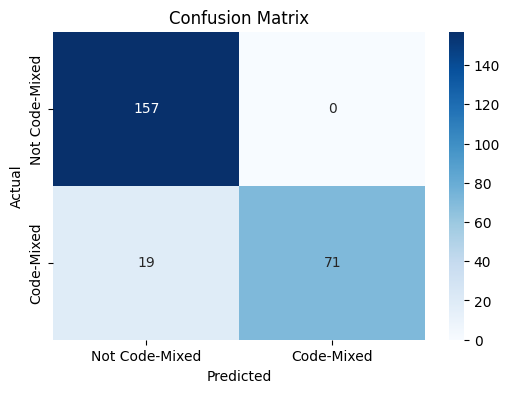

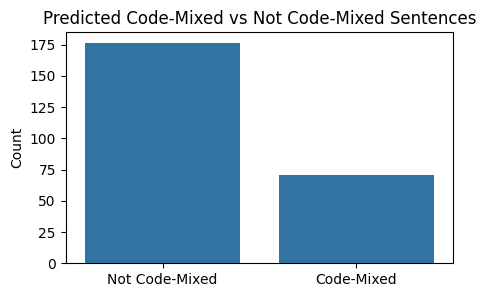

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# === Step 10.1: Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
labels = ['Not Code-Mixed', 'Code-Mixed']

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# === Step 10.2: Bar Chart of Predictions ===
unique, counts = np.unique(y_pred, return_counts=True)
plt.figure(figsize=(5,3))
sns.barplot(x=labels, y=counts)
plt.title("Predicted Code-Mixed vs Not Code-Mixed Sentences")
plt.ylabel("Count")
plt.show()


In [18]:
pip install streamlit langdetect joblib pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.1 MB/s eta 0:00:00


In [19]:
import streamlit as st
import re
from langdetect import detect
import joblib
import numpy as np

# Load the trained model
model = joblib.load("code_mixed_model.pkl")

# Feature extraction (same as before)
def detect_languages(sentence):
    tokens = re.findall(r'\w+', sentence)
    lang_tags = []
    for token in tokens:
        try:
            lang = detect(token)
        except:
            lang = "unknown"
        lang_tags.append(lang)
    return tokens, lang_tags

def extract_features(sentence):
    tokens, lang_tags = detect_languages(sentence)
    total = len(tokens)
    en_count = lang_tags.count('en')
    other_count = total - en_count
    switch_count = sum(1 for i in range(1, len(lang_tags)) if lang_tags[i] != lang_tags[i-1])
    return [total, en_count, other_count, switch_count, en_count / total if total else 0]

# Streamlit App
st.title("🌐 Code-Mixed Sentence Detector")
st.write("Enter a sentence to check if it's code-mixed (English-Telugu)")

sentence = st.text_input("Your Sentence:")

if sentence:
    features = np.array([extract_features(sentence)])
    prediction = model.predict(features)[0]
    label = "✅ Code-Mixed" if prediction == 1 else "❌ Not Code-Mixed"
    st.markdown(f"### Result: {label}")


2025-04-23 19:04:10.639 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 19:04:10.953 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-23 19:04:10.961 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 19:04:10.965 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 19:04:10.966 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 19:04:10.966 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 19:04:10.970 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 19:04:10.971 Thread 'MainThread': mi

In [24]:
import pandas as pd

st.markdown("---")
st.subheader("/content/code_mixed_sentences11.xlsx")

uploaded_file = st.file_uploader("Upload Excel file (.xlsx)", type=["xlsx"])

if uploaded_file:
    try:
        # Load uploaded Excel
        input_df = pd.read_excel(uploaded_file)

        if 'CodeMixedSentence' not in input_df.columns:
            st.error("Excel must have a column named 'CodeMixedSentence'")
        else:
            # Extract features for all rows
            input_df['features'] = input_df['CodeMixedSentence'].apply(extract_features)
            features_array = np.array(input_df['features'].tolist())

            # Predict using model
            input_df['PredictedLabel'] = model.predict(features_array)
            input_df.drop(columns=['features'], inplace=True)

            # Show result
            st.success("Prediction complete ✅")
            st.dataframe(input_df[['CodeMixedSentence', 'PredictedLabel']])

            # Convert to Excel for download
            def convert_df(df):
                return df.to_excel(index=False, engine='openpyxl')

            output_xlsx = convert_df(input_df)
            st.download_button(
                label="📥 Download Results as Excel",
                data=output_xlsx,
                file_name="predicted_output.xlsx",
                mime="application/vnd.openxmlformats-officedocument.spreadsheetml.sheet"
            )
    except Exception as e:
        st.error(f"Error: {str(e)}")


2025-04-23 19:06:51.529 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 19:06:51.531 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 19:06:51.532 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 19:06:51.535 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 19:06:51.537 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 19:06:51.539 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 19:06:51.541 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 19:06:51.543 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [25]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [27]:
st.markdown("---")
st.subheader("🔍 Word-Level Language Split")

word_level_input = st.text_input("Enter a code-mixed sentence for word-level analysis:")

if word_level_input:
    tokens = re.findall(r'\w+', word_level_input)
    en_words = []
    te_words = []

    for token in tokens:
        try:
            lang = detect(token)
            if lang == 'en':
                en_words.append(token)
            else:
                te_words.append(token)
        except:
            te_words.append(token)  # fallback

    col1, col2 = st.columns(2)
    with col1:
        st.success("🟦 English Words")
        st.write(", ".join(en_words) if en_words else "None")
    with col2:
        st.warning("🔶 Telugu / Other Words")
        st.write(", ".join(te_words) if te_words else "None")


2025-04-23 19:10:50.903 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 19:10:50.905 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 19:10:50.907 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 19:10:50.909 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 19:10:50.911 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 19:10:50.912 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 19:10:50.913 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 19:10:50.914 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [28]:
import streamlit as st
import re
from langdetect import detect

st.title("🧠 Code-Mixed Sentence Analyzer")

st.subheader("📝 Enter a sentence (English + Telugu):")
sentence = st.text_input("Type your sentence here:")

if sentence:
    tokens = re.findall(r'\w+', sentence)
    en_words = []
    te_words = []

    for token in tokens:
        try:
            lang = detect(token)
            if lang == 'en':
                en_words.append(token)
            else:
                te_words.append(token)
        except:
            te_words.append(token)

    st.markdown("### 🔍 Word-Level Analysis")
    col1, col2 = st.columns(2)

    with col1:
        st.success("🟦 English Words")
        st.write(", ".join(en_words) if en_words else "None")

    with col2:
        st.warning("🔶 Telugu / Other Words")
        st.write(", ".join(te_words) if te_words else "None")


2025-04-23 19:11:08.985 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 19:11:08.994 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 19:11:08.998 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 19:11:09.002 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 19:11:09.006 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 19:11:09.010 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 19:11:09.014 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 19:11:09.018 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [31]:
!pip install langdetect

from langdetect import detect
import re

def split_english_telugu(sentence):
    tokens = re.findall(r'\w+', sentence)
    en_words = []
    te_words = []

    for token in tokens:
        try:
            lang = detect(token)
            if lang == 'en':
                en_words.append(token)
            else:
                te_words.append(token)
        except:
            te_words.append(token)

    print("🟦 English Words:")
    print(", ".join(en_words) if en_words else "None")

    print("\n🔶 Telugu / Other Words:")
    print(", ".join(te_words) if te_words else "None")

# 🔽 Run this cell each time with a new sentence
input_sentence = input("Enter a code-mixed sentence (English + Telugu): ")
split_english_telugu(input_sentence)


Enter a code-mixed sentence (English + Telugu): hello yela unnav
🟦 English Words:
None

🔶 Telugu / Other Words:
hello, yela, unnav


In [32]:
from langdetect import detect
import re

# Take input
sentence = input("Enter your code-mixed sentence (English + Telugu): ")

tokens = re.findall(r'\w+', sentence)
en_words = []
te_words = []

for token in tokens:
    try:
        lang = detect(token)
        if lang == 'en':
            en_words.append(token)
        else:
            te_words.append(token)
    except:
        te_words.append(token)

print("\n🟦 English Words:")
print(en_words)

print("\n🔶 Telugu / Other Words:")
print(te_words)


Enter your code-mixed sentence (English + Telugu): hello yela

🟦 English Words:
[]

🔶 Telugu / Other Words:
['hello', 'yela']


In [34]:
import ipywidgets as widgets
from IPython.display import display
import re
from langdetect import detect

def classify_words(sentence):
    tokens = re.findall(r'\w+', sentence)
    en_words = []
    te_words = []

    for token in tokens:
        try:
            lang = detect(token)
            if lang == 'en':
                en_words.append(token)
            else:
                te_words.append(token)
        except:
            te_words.append(token)

    print("\n🟦 English Words:")
    print(", ".join(en_words) if en_words else "None")

    print("\n🔶 Telugu / Other Words:")
    print(", ".join(te_words) if te_words else "None")

# Textbox widget
text_box = widgets.Text(
    value='',
    placeholder='Type a code-mixed sentence...',
    description='Sentence:',
    disabled=False,
    layout=widgets.Layout(width='80%')
)

button = widgets.Button(description="Analyze")

def on_button_clicked(b):
    classify_words(text_box.value)

button.on_click(on_button_clicked)

display(text_box, button)


Text(value='', description='Sentence:', layout=Layout(width='80%'), placeholder='Type a code-mixed sentence...…

Button(description='Analyze', style=ButtonStyle())


🟦 English Words:
None

🔶 Telugu / Other Words:
hello, yela, unnav


In [35]:
import ipywidgets as widgets
from IPython.display import display
import re
from langdetect import detect, LangDetectException

def classify_words(sentence):
    tokens = re.findall(r'\w+', sentence)
    en_words = []
    te_words = []

    for token in tokens:
        try:
            lang = detect(token)
            # Check if the language is English
            if lang == 'en':
                en_words.append(token)
            # If it's not detected as English, assume it's Telugu or another language
            else:
                te_words.append(token)
        except LangDetectException:
            # If langdetect throws an exception, consider the word as Telugu/other
            te_words.append(token)

    print("\n🟦 English Words:")
    print(", ".join(en_words) if en_words else "None")

    print("\n🔶 Telugu / Other Words:")
    print(", ".join(te_words) if te_words else "None")

# Textbox widget
text_box = widgets.Text(
    value='',
    placeholder='Type a code-mixed sentence...',
    description='Sentence:',
    disabled=False,
    layout=widgets.Layout(width='80%')
)

button = widgets.Button(description="Analyze")

def on_button_clicked(b):
    classify_words(text_box.value)

button.on_click(on_button_clicked)

display(text_box, button)


Text(value='', description='Sentence:', layout=Layout(width='80%'), placeholder='Type a code-mixed sentence...…

Button(description='Analyze', style=ButtonStyle())


🟦 English Words:
None

🔶 Telugu / Other Words:
hello, yela, unnav


In [36]:
import ipywidgets as widgets
from IPython.display import display
import re
from langdetect import detect, LangDetectException

# Define a list of common English words to help with classification
common_english_words = set([
    "hello", "hi", "thanks", "bye", "good", "morning", "evening", "please", "sorry", "welcome"
])

def classify_words(sentence):
    tokens = re.findall(r'\w+', sentence)
    en_words = []
    te_words = []

    for token in tokens:
        # First, check if the token is in the list of common English words
        if token.lower() in common_english_words:
            en_words.append(token)
        else:
            try:
                lang = detect(token)
                if lang == 'en':
                    en_words.append(token)
                else:
                    te_words.append(token)
            except LangDetectException:
                # If detection fails, consider the word as Telugu/Other
                te_words.append(token)

    print("\n🟦 English Words:")
    print(", ".join(en_words) if en_words else "None")

    print("\n🔶 Telugu / Other Words:")
    print(", ".join(te_words) if te_words else "None")

# Textbox widget
text_box = widgets.Text(
    value='',
    placeholder='Type a code-mixed sentence...',
    description='Sentence:',
    disabled=False,
    layout=widgets.Layout(width='80%')
)

button = widgets.Button(description="Analyze")

def on_button_clicked(b):
    classify_words(text_box.value)

button.on_click(on_button_clicked)

display(text_box, button)


Text(value='', description='Sentence:', layout=Layout(width='80%'), placeholder='Type a code-mixed sentence...…

Button(description='Analyze', style=ButtonStyle())


🟦 English Words:
hello

🔶 Telugu / Other Words:
yela, unnav


In [ ]:
import ipywidgets as widgets
from IPython.display import display
import re
from langdetect import detect, LangDetectException

# Define a list of common English words to help with classification
common_english_words = set([
    "hello", "hi", "thanks", "bye", "good", "morning", "evening", "please", "sorry", "welcome"
])

def classify_words(sentence):
    tokens = re.findall(r'\w+', sentence)
    en_words = []
    te_words = []

    for token in tokens:
        # First, check if the token is in the list of common English words
        if token.lower() in common_english_words:
            en_words.append(token)
        else:
            try:
                lang = detect(token)
                if lang == 'en':
                    en_words.append(token)
                else:
                    te_words.append(token)
            except LangDetectException:
                # If detection fails, consider the word as Telugu/Other
                te_words.append(token)

    print("\n🟦 English Words:")
    print(", ".join(en_words) if en_words else "None")

    print("\n🔶 Telugu / Other Words:")
    print(", ".join(te_words) if te_words else "None")

# Textbox widget
text_box = widgets.Text(
    value='',
    placeholder='Type a code-mixed sentence...',
    description='Sentence:',
    disabled=False,
    layout=widgets.Layout(width='80%')
)

button = widgets.Button(description="Analyze")

def on_button_clicked(b):
    classify_words(text_box.value)

button.on_click(on_button_clicked)

display(text_box, button)


Text(value='', description='Sentence:', layout=Layout(width='80%'), placeholder='Type a code-mixed sentence...…

Button(description='Analyze', style=ButtonStyle())


🟦 English Words:
hello

🔶 Telugu / Other Words:
yela, unnav


In [37]:
!pip install pandas openpyxl scikit-learn langdetect

import re
from langdetect import detect
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import joblib
import os  # Import the os module for file operations
import pandas as pd

# === Step 1: Load your uploaded Excel dataset ===
# Provide the correct path to your Excel file
file_path = "/content/code_mixed_sentences11.xlsx"  # Update with your file path if necessary

# Check if the file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}. Please make sure the file is uploaded or the path is correct.")

df = pd.read_excel(file_path)  # File from your upload
print("Loaded dataset:", df.shape)

# === Step 2: Language Detection Helper ===
def detect_languages(sentence):
    # Convert sentence to string if it's not already
    sentence = str(sentence)  # This line is added to handle non-string values
    tokens = re.findall(r'\w+', sentence)
    lang_tags = []
    for token in tokens:
        try:
            lang = detect(token)
        except:
            lang = "unknown"
        lang_tags.append(lang)
    return tokens, lang_tags

# === Step 3: Feature Extraction Function ===
def extract_features(sentence):
    tokens, lang_tags = detect_languages(sentence)
    total = len(tokens)
    en_count = lang_tags.count('en')
    other_count = total - en_count
    switch_count = sum(1 for i in range(1, len(lang_tags)) if lang_tags[i] != lang_tags[i-1])
    return [total, en_count, other_count, switch_count, en_count/total if total else 0]

# Apply feature extraction
df['features'] = df['CodeMixedSentence'].apply(extract_features)
X_cm = np.array(df['features'].tolist())
y_cm = np.ones(len(df))  # Label 1 for code-mixed

# === Step 4: Create synthetic non-code-mixed samples (label 0) ===
synthetic_english = [
    "This is a nice day.",
    "I am going to school.",
    "We had dinner together.",
    "Let's play football.",
    "She reads every day."
] * (len(df) // 5)

synthetic_telugu = [
    "Nenu school ki veltunna.",
    "Aame rojuki oka book chadutundi.",
    "Manam kalisi dinner chesamu.",
    "Football aadudham.",
    "Idi chala bagundi."
] * (len(df) // 5)

synthetic_sentences = synthetic_english + synthetic_telugu
y_synth = [0] * len(synthetic_sentences)
X_synth = np.array([extract_features(sent) for sent in synthetic_sentences])

# === Step 5: Combine datasets ===
X = np.vstack([X_cm, X_synth])
y = np.concatenate([y_cm, y_synth])

# === Step 6: Train the Classifier ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# === Step 7: Evaluate the Model ===
y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# === Optional: Save the model ===
joblib.dump(clf, "code_mixed_model.pkl")

Loaded dataset: (413, 1)
Classification Report:

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94       157
         1.0       1.00      0.77      0.87        90

    accuracy                           0.91       247
   macro avg       0.94      0.88      0.90       247
weighted avg       0.93      0.91      0.91       247



['code_mixed_model.pkl']

In [39]:
!pip install pandas openpyxl scikit-learn langdetect

import re
from langdetect import detect
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import joblib
import os  # Import the os module for file operations
import pandas as pd

!pip install pandas openpyxl scikit-learn langdetect

import re
from langdetect import detect
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import joblib
import os  # Import the os module for file operations
import pandas as pd

# === Step 1: Load your uploaded Excel dataset ===
# Provide the correct path to your Excel file
file_path = "/content/code_mixed_sentences11.xlsx"  # Update with your file path if necessary

# Check if the file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}. Please make sure the file is uploaded or the path is correct.")

df = pd.read_excel(file_path)  # File from your upload
print("Loaded dataset:", df.shape)

# === Step 2: Language Detection Helper ===
def detect_languages(sentence):
    # Convert sentence to string if it's not already
    sentence = str(sentence)  # This line is added to handle non-string values
    tokens = re.findall(r'\w+', sentence)
    lang_tags = []
    for token in tokens:
        try:
            lang = detect(token)
        except:
            lang = "unknown"
        lang_tags.append(lang)
    return tokens, lang_tags

# === Step 3: Feature Extraction Function ===
def extract_features(sentence):
    tokens, lang_tags = detect_languages(sentence)
    total = len(tokens)
    en_count = lang_tags.count('en')
    other_count = total - en_count
    switch_count = sum(1 for i in range(1, len(lang_tags)) if lang_tags[i] != lang_tags[i-1])
    return [total, en_count, other_count, switch_count, en_count/total if total else 0]

# Apply feature extraction
df['features'] = df['CodeMixedSentence'].apply(extract_features)
X_cm = np.array(df['features'].tolist())
y_cm = np.ones(len(df))  # Label 1 for code-mixed

# === Step 4: Create synthetic non-code-mixed samples (label 0) ===
synthetic_english = [
    "This is a nice day.",
    "I am going to school.",
    "We had dinner together.",
    "Let's play football.",
    "She reads every day."
] * (len(df) // 5)

synthetic_telugu = [
    "Nenu school ki veltunna.",
    "Aame rojuki oka book chadutundi.",
    "Manam kalisi dinner chesamu.",
    "Football aadudham.",
    "Idi chala bagundi."
] * (len(df) // 5)

synthetic_sentences = synthetic_english + synthetic_telugu
y_synth = [0] * len(synthetic_sentences)
X_synth = np.array([extract_features(sent) for sent in synthetic_sentences])

# === Step 5: Combine datasets ===
X = np.vstack([X_cm, X_synth])
y = np.concatenate([y_cm, y_synth])

# === Step 6: Train the Classifier ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# === Step 7: Evaluate the Model ===
y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# === Optional: Save the model ===
joblib.dump(clf, "code_mixed_model.pkl")

def split_english_telugu(sentence):
    """Splits a sentence into English and Telugu/Other words."""
    tokens = re.findall(r'\w+', sentence)
    en_words = []
    te_words = []

    for token in tokens:
        try:
            lang = detect(token)
            if lang == 'en':
                en_words.append(token)
            else:
                te_words.append(token)  # Assume non-English as Telugu/Other
        except:
            te_words.append(token)  # Fallback if detection fails

    return en_words, te_words


# Example usage:
test_sentence = "This is a sample sentence with Telugu words like nenu, meeru, and bagundi."
en_words, te_words = split_english_telugu(test_sentence)

print("English words:", en_words)
print("Telugu/Other words:", te_words)

Loaded dataset: (413, 1)
Classification Report:

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       157
         1.0       0.99      0.78      0.87        90

    accuracy                           0.91       247
   macro avg       0.94      0.89      0.90       247
weighted avg       0.92      0.91      0.91       247

English words: ['This', 'with', 'and']
Telugu/Other words: ['is', 'a', 'sample', 'sentence', 'Telugu', 'words', 'like', 'nenu', 'meeru', 'bagundi']


In [40]:
# Install required packages
!pip install pandas openpyxl scikit-learn langdetect

# Import necessary libraries
import re
from langdetect import detect
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import joblib
import os  # Import the os module for file operations
import pandas as pd

# === Step 1: Load your uploaded Excel dataset ===
# Provide the correct path to your Excel file
file_path = "/content/code_mixed_sentences11.xlsx"  # Update with your file path if necessary

# Check if the file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}. Please make sure the file is uploaded or the path is correct.")

df = pd.read_excel(file_path)  # File from your upload
print("Loaded dataset:", df.shape)

# === Step 2: Language Detection Helper ===
def detect_languages(sentence):
    # Convert sentence to string if it's not already
    sentence = str(sentence)  # This line is added to handle non-string values
    tokens = re.findall(r'\w+', sentence)
    lang_tags = []
    for token in tokens:
        try:
            lang = detect(token)
        except:
            lang = "unknown"
        lang_tags.append(lang)
    return tokens, lang_tags

# === Step 3: Feature Extraction Function ===
def extract_features(sentence):
    tokens, lang_tags = detect_languages(sentence)
    total = len(tokens)
    en_count = lang_tags.count('en')
    other_count = total - en_count
    switch_count = sum(1 for i in range(1, len(lang_tags)) if lang_tags[i] != lang_tags[i-1])
    return [total, en_count, other_count, switch_count, en_count/total if total else 0]

# Apply feature extraction
df['features'] = df['CodeMixedSentence'].apply(extract_features)
X_cm = np.array(df['features'].tolist())
y_cm = np.ones(len(df))  # Label 1 for code-mixed

# === Step 4: Create synthetic non-code-mixed samples (label 0) ===
synthetic_english = [
    "This is a nice day.",
    "I am going to school.",
    "We had dinner together.",
    "Let's play football.",
    "She reads every day."
] * (len(df) // 5)

synthetic_telugu = [
    "Nenu school ki veltunna.",
    "Aame rojuki oka book chadutundi.",
    "Manam kalisi dinner chesamu.",
    "Football aadudham.",
    "Idi chala bagundi."
] * (len(df) // 5)

synthetic_sentences = synthetic_english + synthetic_telugu
y_synth = [0] * len(synthetic_sentences)
X_synth = np.array([extract_features(sent) for sent in synthetic_sentences])

# === Step 5: Combine datasets ===
X = np.vstack([X_cm, X_synth])
y = np.concatenate([y_cm, y_synth])

# === Step 6: Train the Classifier ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# === Step 7: Evaluate the Model ===
y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# === Optional: Save the model ===
joblib.dump(clf, "code_mixed_model.pkl")

# === Step 8: Function to split English and Telugu words ===
def split_english_telugu(sentence):
    """Splits a sentence into English and Telugu/Other words."""
    tokens = re.findall(r'\w+', sentence)
    en_words = []
    te_words = []

    for token in tokens:
        try:
            lang = detect(token)
            if lang == 'en':
                en_words.append(token)
            else:
                te_words.append(token)  # Assume non-English as Telugu/Other
        except:
            te_words.append(token)  # Fallback if detection fails

    return en_words, te_words

# Example usage of the split_english_telugu function:
test_sentence = "This is a sample sentence with Telugu words like nenu, meeru, and bagundi."

# Split the sentence into English and Telugu/Other words
en_words, te_words = split_english_telugu(test_sentence)

# Display the result
print("\nEnglish words:", en_words)
print("Telugu/Other words:", te_words)


Loaded dataset: (413, 1)
Classification Report:

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94       157
         1.0       1.00      0.77      0.87        90

    accuracy                           0.91       247
   macro avg       0.94      0.88      0.90       247
weighted avg       0.93      0.91      0.91       247


English words: ['This', 'with', 'and']
Telugu/Other words: ['is', 'a', 'sample', 'sentence', 'Telugu', 'words', 'like', 'nenu', 'meeru', 'bagundi']


In [44]:
# Install required packages
!pip install pandas openpyxl scikit-learn langdetect

# Import necessary libraries
import re
from langdetect import detect
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import joblib
import os  # Import the os module for file operations
import pandas as pd

# === Step 1: Load your uploaded Excel dataset ===
# Provide the correct path to your Excel file
file_path = "/content/code_mixed_sentences11.xlsx"  # Update with your file path if necessary

# Check if the file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}. Please make sure the file is uploaded or the path is correct.")

df = pd.read_excel(file_path)  # File from your upload
print("Loaded dataset:", df.shape)

# === Step 2: Language Detection Helper ===
def detect_languages(sentence):
    # Convert sentence to string if it's not already
    sentence = str(sentence)  # This line is added to handle non-string values
    tokens = re.findall(r'\w+', sentence)
    lang_tags = []
    for token in tokens:
        try:
            lang = detect(token)
        except:
            lang = "unknown"
        lang_tags.append(lang)
    return tokens, lang_tags

# === Step 3: Feature Extraction Function ===
def extract_features(sentence):
    tokens, lang_tags = detect_languages(sentence)
    total = len(tokens)
    en_count = lang_tags.count('en')
    other_count = total - en_count
    switch_count = sum(1 for i in range(1, len(lang_tags)) if lang_tags[i] != lang_tags[i-1])
    return [total, en_count, other_count, switch_count, en_count/total if total else 0]

# Apply feature extraction
df['features'] = df['CodeMixedSentence'].apply(extract_features)
X_cm = np.array(df['features'].tolist())
y_cm = np.ones(len(df))  # Label 1 for code-mixed

# === Step 4: Create synthetic non-code-mixed samples (label 0) ===
synthetic_english = [
    "This is a nice day.",
    "I am going to school.",
    "We had dinner together.",
    "Let's play football.",
    "She reads every day."
] * (len(df) // 5)

synthetic_telugu = [
    "Nenu school ki veltunna.",
    "Aame rojuki oka book chadutundi.",
    "Manam kalisi dinner chesamu.",
    "Football aadudham.",
    "Idi chala bagundi."
] * (len(df) // 5)

synthetic_sentences = synthetic_english + synthetic_telugu
y_synth = [0] * len(synthetic_sentences)
X_synth = np.array([extract_features(sent) for sent in synthetic_sentences])

# === Step 5: Combine datasets ===
X = np.vstack([X_cm, X_synth])
y = np.concatenate([y_cm, y_synth])

# === Step 6: Train the Classifier ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# === Step 7: Evaluate the Model ===
y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# === Optional: Save the model ===
joblib.dump(clf, "code_mixed_model.pkl")

# === Step 8: Function to split English and Telugu words (with improvement) ===
def split_english_telugu(sentence):
    """Splits a sentence into English and Telugu/Other words."""
    tokens = re.findall(r'\w+', sentence)
    en_words = []
    te_words = []

    # Predefined list of common English words (optional improvement)
    common_english_words = {'hello', 'hi', 'how', 'are', 'you', 'this', 'is', 'a', 'the', 'my', 'it', 'we', 'I'}

    for token in tokens:
        # First check if it's a common English word
        if token.lower() in common_english_words:
            en_words.append(token)
        else:
            try:
                lang = detect(token)
                if lang == 'en':
                    en_words.append(token)
                else:
                    te_words.append(token)  # Assume non-English as Telugu/Other
            except:
                te_words.append(token)  # Fallback if detection fails

    return en_words, te_words

# === Step 9: Function to test any sentence ===
def test_code_mixed_sentence(sentence):
    en_words, te_words = split_english_telugu(sentence)
    print("English words:", en_words)
    print("Telugu/Other words:", te_words)

# Example test sentence
test_sentence = "hello yevaru"

# Test the sentence
test_code_mixed_sentence(test_sentence)

# Now you can enter your custom sentence:
custom_sentence = input("\nEnter a sentence with mixed English and Telugu words: ")
test_code_mixed_sentence(custom_sentence)



Loaded dataset: (413, 1)
Classification Report:

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93       157
         1.0       1.00      0.76      0.86        90

    accuracy                           0.91       247
   macro avg       0.94      0.88      0.90       247
weighted avg       0.92      0.91      0.91       247

English words: ['hello']
Telugu/Other words: ['yevaru']

Enter a sentence with mixed English and Telugu words: hi how are you nenu bagunna nuvu fine thank you
English words: ['hi', 'how', 'are', 'you', 'thank', 'you']
Telugu/Other words: ['nenu', 'bagunna', 'nuvu', 'fine']
